In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [77]:
# Replace 'your_file.csv' with the path to your CSV file
train_path = '/home/whitedevil/Desktop/Education/FoML/Kaggle_Hackathon/vnb-foml-2024-hackathon/foml24_hackathon/train.csv'
test_path = '/home/whitedevil/Desktop/Education/FoML/Kaggle_Hackathon/vnb-foml-2024-hackathon/foml24_hackathon/test.csv'

# Read the CSV file into a DataFrame
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# # Display the first few rows of the data
# print(train_data.head(5))
# print(test_data.head(5))

print(train_data.columns)
data = train_data

Index(['UID', 'AgriculturalPostalZone', 'AgricultureZoningCode',
       'CropFieldConfiguration', 'CropSpeciesVariety', 'CultivatedAndWildArea',
       'CultivatedAreaSqft1', 'DistrictId', 'FarmClassification',
       'FarmEquipmentArea', 'FarmShedAreaSqft', 'FarmVehicleCount',
       'FarmingCommunityId', 'FarmingUnitCount', 'FieldConstructionType',
       'FieldEstablishedYear', 'FieldShadeCover', 'FieldSizeSqft',
       'FieldZoneLevel', 'HarvestProcessingType', 'HarvestStorageSqft',
       'HasGreenHouse', 'HasPestControl', 'LandUsageType', 'Latitude',
       'Longitude', 'MainIrrigationSystemCount', 'NationalRegionCode',
       'NaturalLakePresence', 'NumberGreenHouses', 'NumberOfFarmingZones',
       'OtherZoningCode', 'PartialIrrigationSystemCount',
       'PerimeterGuardPlantsArea', 'PrimaryCropAreaSqft',
       'PrimaryCropAreaSqft2', 'RawLocationId', 'ReservoirType',
       'ReservoirWithFilter', 'SoilFertilityType', 'StorageAndFacilityCount',
       'TaxAgrarianValue', 'TaxL

# Null Values

In [78]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns


# Missing values statistics
miss_values = null_values(data)
miss_values

Dataframe has 58 columns.
There are 55 columns that have missing values.


,Missing Values,% of Total Values
FarmClassification,112552,100.0
PerimeterGuardPlantsArea,112525,100.0
FieldZoneLevel,112512,99.9
UndergroundStorageSqft,112512,99.9
HarvestStorageSqft,112457,99.9
HasGreenHouse,112305,99.8
CropFieldConfiguration,112274,99.7
FieldConstructionType,112239,99.7
CultivatedAndWildArea,112027,99.5
FieldShadeCover,111701,99.2


## Handle corelating the features with output

In [79]:
threshold = 0.8  # 80% missing values

# Calculate the threshold for non-null values (1 - threshold)
threshold_count = int((1 - threshold) * len(data))

# Drop columns where the number of non-null values is less than the threshold count
data = data.dropna(axis=1, thresh=threshold_count)

# Display the cleaned DataFrame
print(data)

           UID  AgriculturalPostalZone  AgricultureZoningCode  \
0        12998                  291674                    0.0   
1        20860                  164397                   28.0   
2        75725                  616532                    0.0   
3       106521                  942111                   43.0   
4        99467                  475557                   38.0   
...        ...                     ...                    ...   
112564   26998                  380364                   41.0   
112565  135304                  369784                   24.0   
112566  153756                  414700                   37.0   
112567  129907                  566488                   19.0   
112568  103354                  540570                   28.0   

        CropSpeciesVariety  CultivatedAreaSqft1  DistrictId  \
0                      3.0               1136.0         1.0   
1                      4.0               2083.0         1.0   
2                      2.0    

Text(0, 0.5, 'Data type')

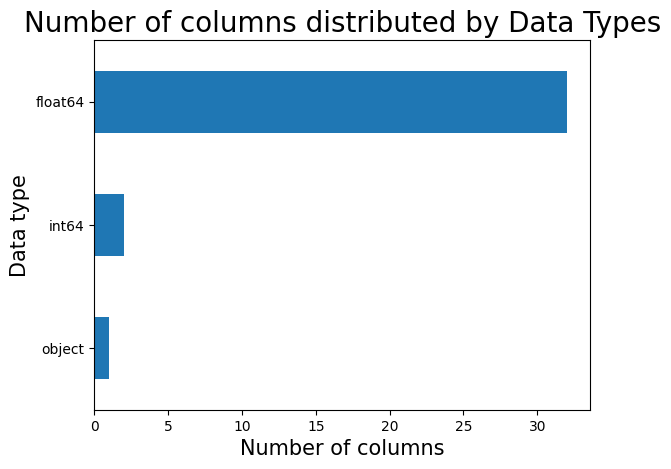

In [80]:
# Number of each type of column
data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

## Handling 'Target' Variable

In [81]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target column
data['Target'] = label_encoder.fit_transform(data['Target'])

/tmp/ipykernel_22549/4126785178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = label_encoder.fit_transform(data['Target'])


In [82]:
print(train_data.columns, "length = ", len(train_data.columns))
data = train_data

Index(['UID', 'AgriculturalPostalZone', 'AgricultureZoningCode',
       'CropFieldConfiguration', 'CropSpeciesVariety', 'CultivatedAndWildArea',
       'CultivatedAreaSqft1', 'DistrictId', 'FarmClassification',
       'FarmEquipmentArea', 'FarmShedAreaSqft', 'FarmVehicleCount',
       'FarmingCommunityId', 'FarmingUnitCount', 'FieldConstructionType',
       'FieldEstablishedYear', 'FieldShadeCover', 'FieldSizeSqft',
       'FieldZoneLevel', 'HarvestProcessingType', 'HarvestStorageSqft',
       'HasGreenHouse', 'HasPestControl', 'LandUsageType', 'Latitude',
       'Longitude', 'MainIrrigationSystemCount', 'NationalRegionCode',
       'NaturalLakePresence', 'NumberGreenHouses', 'NumberOfFarmingZones',
       'OtherZoningCode', 'PartialIrrigationSystemCount',
       'PerimeterGuardPlantsArea', 'PrimaryCropAreaSqft',
       'PrimaryCropAreaSqft2', 'RawLocationId', 'ReservoirType',
       'ReservoirWithFilter', 'SoilFertilityType', 'StorageAndFacilityCount',
       'TaxAgrarianValue', 'TaxL

## Handling the 'CropFieldConfiguration' feature's missing values

In [83]:
# Define a function to fill missing values with the median of the corresponding group
def fill_missing_values(row):
    if pd.isna(row['CropFieldConfiguration']):
        # Calculate the median for the current AgricultureZoningCode group
        median_value = data[data['AgricultureZoningCode'] == row['AgricultureZoningCode']]['CropFieldConfiguration'].median()
        return median_value
    else:
        return row['CropFieldConfiguration']




# Function to replace missing values (NaN) with mode of the column
def replace_missing_with_mode(df):
    for column in df.columns:
        # If the column has missing values, replace them with the mode (most frequent value)
        if df[column].isnull().any():
            mode_value = df[column].mode()[0]  # Get the most frequent value
            # print(column," : ", mode  _value)
            df[column].fillna(mode_value, inplace=True)  # Replace NaN with the mode
    return df

# Replace missing values with the mode of each column
data = replace_missing_with_mode(data)

print("\n")

/tmp/ipykernel_22549/3467588601.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Replace NaN with the mode


In [84]:
# Missing values statistics
miss_values = null_values(data)
miss_values

Dataframe has 58 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## One-Hot Encoding

In [85]:
# data = pd.get_dummies(data, columns=['CropFieldConfiguration'], prefix='CropFieldConfiguration')


## Columns to drop

In [86]:
# Drop columns by specifying their names
columns_to_drop = ['UID', 'AgriculturalPostalZone', ]  # Replace with the names of the columns you want to drop
data = data.drop(columns=columns_to_drop)



## Splitting the train and validation data

In [87]:

trainInput = train_data.drop('Target', axis=1)
trainOutput = train_data['Target']
testInput = test_data


trainInput = data.drop('Target', axis=1)
trainOutput = data['Target']
# Split the data into train and validation sets with stratification
X_train, X_val, y_train, y_val = train_test_split(
    trainInput, trainOutput, 
    test_size=0.2,  # 20% of the data for validation
    stratify=trainOutput,     # Stratify based on the target variable
    random_state=42 # Setting a random state for reproducibility
)



In [89]:
print(train_data.columns, "length = ", len(train_data.columns))


Index(['UID', 'AgriculturalPostalZone', 'AgricultureZoningCode',
       'CropFieldConfiguration', 'CropSpeciesVariety', 'CultivatedAndWildArea',
       'CultivatedAreaSqft1', 'DistrictId', 'FarmClassification',
       'FarmEquipmentArea', 'FarmShedAreaSqft', 'FarmVehicleCount',
       'FarmingCommunityId', 'FarmingUnitCount', 'FieldConstructionType',
       'FieldEstablishedYear', 'FieldShadeCover', 'FieldSizeSqft',
       'FieldZoneLevel', 'HarvestProcessingType', 'HarvestStorageSqft',
       'HasGreenHouse', 'HasPestControl', 'LandUsageType', 'Latitude',
       'Longitude', 'MainIrrigationSystemCount', 'NationalRegionCode',
       'NaturalLakePresence', 'NumberGreenHouses', 'NumberOfFarmingZones',
       'OtherZoningCode', 'PartialIrrigationSystemCount',
       'PerimeterGuardPlantsArea', 'PrimaryCropAreaSqft',
       'PrimaryCropAreaSqft2', 'RawLocationId', 'ReservoirType',
       'ReservoirWithFilter', 'SoilFertilityType', 'StorageAndFacilityCount',
       'TaxAgrarianValue', 'TaxL

## Gradient Boosting Classifier

In [88]:
exit

# Setting up parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7]  # Maximum tree depth
}

param_grid = {
    'n_estimators': [50],  # Number of trees
    'learning_rate': [0.1],  # Step size shrinkage
    'max_depth': [5]  # Maximum tree depth
}

# Initialize GradientBoostingClassifier
gradientBoostingClassifier = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV with multi-class classification
grid_search = GridSearchCV(gradientBoostingClassifier, param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-2)

grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions on the validation set
predictions_GB = best_model.predict(X_val)

# Accuracy, Precision, Recall (Macro-averaged for multi-class)
accuracy_gb = accuracy_score(y_val, predictions_GB)
precision_gb = precision_score(y_val, predictions_GB, average='macro')  # Macro-average precision
recall_gb = recall_score(y_val, predictions_GB, average='macro')  # Macro-average recall

# Print results
print("Best Gradient Boosting Parameters:", best_params)
print("Gradient Boosting Accuracy:", accuracy_gb)
# print("Gradient Boosting Precision (Macro):", precision_gb)
# print("Gradient Boosting Recall (Macro):", recall_gb)

KeyboardInterrupt: 

## xGBoost Classifier

In [ ]:
exit
# Set up parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum tree depth
    'subsample': [0.8, 1.0],  # Fraction of samples to use for training each tree
    'colsample_bytree': [0.8, 1.0]  # Fraction of features to use for each tree
}

param_grid = {
    'n_estimators': [100],  # Number of trees
    'learning_rate': [0.1],  # Step size shrinkage
    'max_depth': [5],  # Maximum tree depth
    'subsample': [0.8, 1.0],  # Fraction of samples to use for training each tree
    'colsample_bytree': [0.8, 1.0]  # Fraction of features to use for each tree
}

# Initialize XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Set up GridSearchCV with multi-class classification
grid_search = GridSearchCV(xgboost_classifier, param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-2)

grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions on the validation set
predictions_XGB = best_model.predict(X_val)

# Accuracy, Precision, Recall (Macro-averaged for multi-class)
accuracy_xgb = accuracy_score(y_val, predictions_XGB)
precision_xgb = precision_score(y_val, predictions_XGB, average='macro')  # Macro-average precision
recall_xgb = recall_score(y_val, predictions_XGB, average='macro')  # Macro-average recall

# Print results
print("Best XGBoost Parameters:", best_params)
print("XGBoost Accuracy:", accuracy_xgb)
# print("XGBoost Precision (Macro):", precision_xgb)
# print("XGBoost Recall (Macro):", recall_xgb)


Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
XGBoost Accuracy: 0.6035799946699831
